# Calculating the Risk of a Security

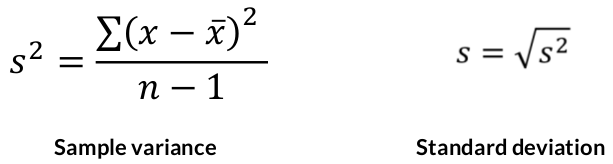

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt

In [2]:
# BEI.DE => BEIERSDORF AG O.N.
tickers = ["PG", "BEI.DE"]

securities_data = pd.DataFrame()

for ticker in tickers:
    securities_data[ticker] = web.DataReader(ticker, data_source="yahoo", start="2007-1-1")["Adj Close"]

In [3]:
securities_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3423 entries, 2007-01-03 to 2020-08-06
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      3423 non-null   float64
 1   BEI.DE  3360 non-null   float64
dtypes: float64(2)
memory usage: 80.2 KB


In [4]:
# using log because we will analise the data of the securities separatly 
securities_return = np.log(securities_data / securities_data.shift(1))

In [5]:
print(securities_return)

                  PG    BEI.DE
Date                          
2007-01-03       NaN       NaN
2007-01-04 -0.007621  0.006544
2007-01-05 -0.008624 -0.020772
2007-01-08  0.002202  0.000202
2007-01-09 -0.002517 -0.022858
...              ...       ...
2020-07-31 -0.002285  0.001979
2020-08-03  0.001296  0.016667
2020-08-04  0.018863 -0.005851
2020-08-05 -0.002619  0.005851
2020-08-06 -0.005486 -0.057118

[3423 rows x 2 columns]


## Procter & Gamble

### Daily average return 

In [6]:
securities_return["PG"].mean()

0.00033016753715719326

### Annualy average return

In [7]:
securities_return["PG"].mean() * 250

0.08254188428929832

### Daily Standard Deviation (Risk or Volatility)

In [8]:
# std stands from STandard Deviation
securities_return["PG"].std()

0.011947513469290339

### Annualy Standard Deviation

In [9]:
securities_return["PG"].std() * 250

2.9868783673225847

## Beiersdorf

In [10]:
# daily average return
securities_return["BEI.DE"].mean()

0.0002397346302415266

In [11]:
# annualy  average return
securities_return["BEI.DE"].mean() * 250

0.05993365756038165

In [12]:
# daily standard deviation
securities_return["BEI.DE"].std()

0.013845660174112952

In [13]:
# annualy standard deviation
securities_return["BEI.DE"].mean() * 250

0.05993365756038165

### Calculating both securities at the same time

In [14]:
# daily average return
securities_return[["PG","BEI.DE"]].mean()

PG        0.00033
BEI.DE    0.00024
dtype: float64

In [15]:
# annualy average return
securities_return[["PG","BEI.DE"]].mean() * 250

PG        0.082542
BEI.DE    0.059934
dtype: float64

In [16]:
# daily standard deviation
securities_return[["PG","BEI.DE"]].std()

PG        0.011948
BEI.DE    0.013846
dtype: float64

In [17]:
# annualy standard deviation 
# multiplying for 0.5 represents the square root of the variance
# s = √s² (standard deviation = square root of the variance
securities_return[["PG","BEI.DE"]].std() * 250 ** 0.5

PG        0.188907
BEI.DE    0.218919
dtype: float64

# Covariance and Correlation
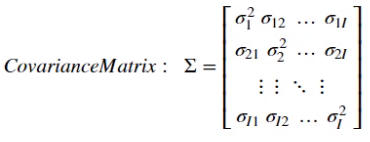

**Covariance Matrix** is a representation of the way two or more variables relate to each others.

The covariance between the variable and itself is the variance of that same variable.

**Graphic:** Along the main diagonal we have the variances of the variables, and the rest of the table is filled with the covariances between them.

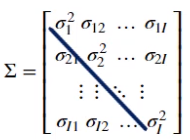


In this example, the variables are **two** stock prices (PG, DEI.BE)

Therefore, it is expected **2 by 2** _covariance matrix_ with the **variances of each stock along the main diagonal**, and the **covariance between the stocks displayed in the other two cells**.

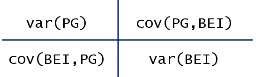

## Calculating the Variance Individually

### Daily PG variance

In [20]:
PG_variance = securities_return["PG"].var()
print(PG_variance)

0.00014274307809887407


### Annualy PG variance

In [23]:
PG_variance = securities_return["PG"].var() * 250
print(PG_variance)

0.03568576952471852


### Daily Beiersdorf variance

In [22]:
BEI_variance = securities_return["BEI.DE"].var()
print(BEI_variance)

0.0001917023056570175


### Daily Beiersdorf variance

In [24]:
BEI_variance = securities_return["BEI.DE"].var() * 250
print(BEI_variance)

0.04792557641425437


### Calculating Covariance


pandas.DataFrame.cov() computes pairwise (two at time) covariance of columns

### Daily Covariance Matrix

In [25]:
covariance_matrix = securities_return.cov()
print(covariance_matrix)

              PG    BEI.DE
PG      0.000143  0.000045
BEI.DE  0.000045  0.000192


### Annual Covariance Matrix

In [26]:
covariance_matrix = securities_return.cov() * 250
print(covariance_matrix)

              PG    BEI.DE
PG      0.035686  0.011255
BEI.DE  0.011255  0.047926


PG      **0.035686**
BEI.DE  **0.047926**

Represents the variance of the two stocks

PG      **0.011255**
BEI.DE  **0.011255**

The **covariance between PG and BEI.DE** and the **covariance between BEI.DE and PG** are the **same**

### Calculating the Correlation

pandas.DataFrame.corr() computes pairwise correlation of columns

In [27]:
correlation_matrix = securities_return.corr()
print(correlation_matrix)

              PG    BEI.DE
PG      1.000000  0.271694
BEI.DE  0.271694  1.000000


The **main diagonal** has the **1.00** values because we divided the variances of both stocks (PG. BEI.DE) by the same values, so it makes sense that the movement of the stocks is perfectly correlated with itself.

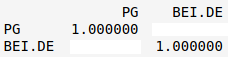

### The Correlation Formula

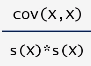

The **product of the standard deviation of x and the standard deviation of x** (_s(X) * s(X)_) is **the variance of x** (_var(X)_).

The other two cells in the correlation table (**0.271694**) contain the same number. They indicated that the stock return of the two companies are weakly correlately.

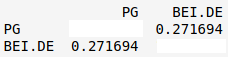

### This is NOT the correlation between the price of the two equities!

### This is the correlaction between RETURNS

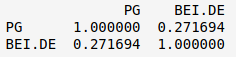

### Correlation between the rate of returns

- Reflects the difference between prices at different times and focuses on the **returns** of your portfolio rather than on the stock price levels.

- As an investor, return is what you care about not the nominal price of the stock
- You want to know how much you have earned after investing at certain company not the quoted price of its shares


### Correlation between the prices 
- Focuses on stock price levels


### Dont' fall in the trap to of ANNUALIZING the correlation table!

- It **does not** contains average daily values
- It shows the relation that exists bewteen the two variables
